<a href="https://colab.research.google.com/github/Adamixa/Data_field_job_analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adam:

## Data Loading and Initial Exploration:

### Importing pandas and loading the data:

In [95]:
import pandas as pd
df = pd.read_csv('./jobs_in_data_2024.csv', sep = ',')

### Intial data exploaration :

In [96]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [97]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [98]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [99]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3560,2024,Mid-level,Full-time,Data Scientist,82915,USD,82915,United States,In-person,United States,M,Data Science and Research
5951,2023,Senior,Full-time,Data Engineer,280000,USD,280000,United States,In-person,United States,M,Data Engineering
8400,2023,Mid-level,Full-time,Data Scientist,83280,CAD,61699,Canada,Remote,Canada,L,Data Science and Research
13351,2022,Senior,Full-time,Data Scientist,172000,USD,172000,United States,Remote,United States,M,Data Science and Research
8726,2023,Senior,Full-time,Research Scientist,145900,USD,145900,United States,In-person,United States,M,Data Science and Research


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [132]:
df.groupby(by=['work_year','job_category'])[['salary_in_usd']].mean()


salary_in_usd
work_year job_category                                 
2020      Data Analysis                    68014.666667
          Data Engineering                 94575.823529
          Data Science and Research       129538.827586
          Machine Learning and AI         113276.400000
2021      Data Analysis                    87818.500000
          Data Architecture and Modeling  169940.600000
          Data Engineering                107192.288889
          Data Management and Strategy    165000.000000
          Data Science and Research       107517.819444
          Leadership and Management       131892.888889
          Machine Learning and AI         101396.891892
2022      BI and Visualization            100875.000000
          Cloud and Database              175000.000000
          Data Analysis                   107220.831034
          Data Architecture and Modeling  166091.543478
          Data Engineering                139629.909820
          Data Management and Strategy    114024.416667
          Data Quality and Operations      84770.833333
          Data Science and Research       143343.794000
          Leadership and Management       136901.437500
          Machine Learning and AI         144289.064516
2023      BI and Visualization            132045.851752
          Cloud and Database              141666.666667
          Data Analysis                   107907.573405
          Data Architecture and Modeling  153193.936508
          Data Engineering                149396.679006
          Data Management and Strategy     95169.706897
          Data Quality and Operations     103316.422222
          Data Science and Research       168395.044299
          Leadership and Management       145814.012931
          Machine Learning and AI         186432.014116
2024      BI and Visualization            116225.696833
          Cloud and Database              132666.666667
          Data Analysis                   105788.605263
          Data Architecture and Modeling  158069.008621
          Data Engineering                148341.130496
          Data Management and Strategy     84164.500000
          Data Quality and Operations      88216.636364
          Data Science and Research       161078.688636
          Leadership and Management       138802.155462
          Machine Learning and AI         189814.411248

## Data Cleaning:

### Checking for null values:

In [102]:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


### Checking for duplicates:

In [103]:
duplicate_rows = df.duplicated().sum()

print('Number of duplicate rows:',duplicate_rows)

Number of duplicate rows: 5493


### Checking which categorical coloumns need to be addressed:

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


### Dealing with duplicates:

### Dealing with categorical coloumns:

In [105]:
# df['experience_level'] = df['experience_level'].replace({'Entry-level': 0, 'Mid-level': 1, 'Senior': 2, 'Executive': 3})
# 
# df['employment_type'] = df['employment_type'].replace({'Freelance': 0, 'Part-time': 1, 'Contract': 2, 'Full-time': 3})
# 
# df['work_setting'] = df['work_setting'].replace({'Remote': 0, 'Hybrid': 1, 'In-person': 2})
# 
# df['company_size'] = df['company_size'].replace({'S': 0, 'M': 1, 'L': 2})
# 
# df

## testing plots:

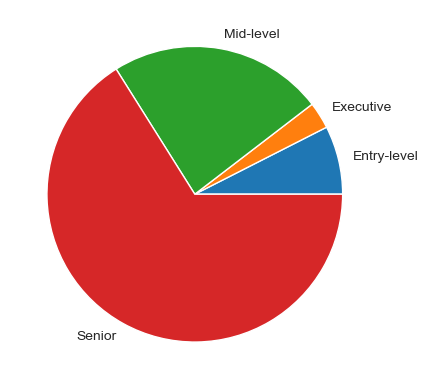

In [106]:
import matplotlib.pyplot as  plt
df.experience_level.str.get_dummies(sep = ",").sum().plot.pie();

<Axes: ylabel='Frequency'>

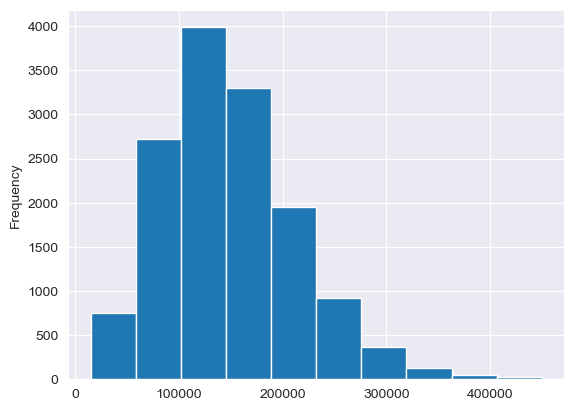

In [107]:
df["salary_in_usd"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

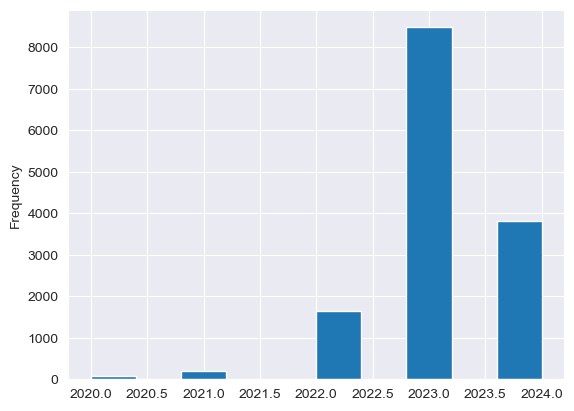

In [108]:
df["work_year"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

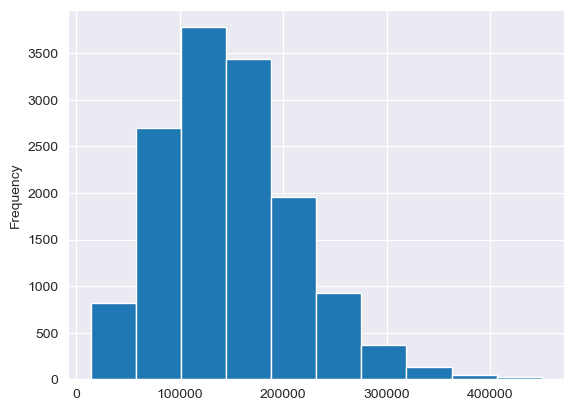

In [109]:
df["salary"].plot(kind = 'hist')

# Moudi:

### 1. Data Loading and Initial Exploration:

Load the selected dataset into your preferred data analysis environment.


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('/content/jobs_in_data_2024 (1).csv', sep = ',') # to read file

In [111]:
df # to view the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


Explore the structure of the dataset (number of rows and columns, data types, etc.).

In [112]:
num_rows, num_cols = df.shape # num of cols and rows
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 14199
Number of columns: 12


In [113]:
df.dtypes # every column's type

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object

Examine the first few rows of the dataset to understand its contents

In [114]:
df.head(3) # show the first 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization


In [115]:
df.tail(3) # show last 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research
14198,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L,Data Analysis


In [116]:
df.sample(3) # 3 randoms rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
4837,2023,Mid-level,Full-time,Data Analyst,70000,USD,70000,Philippines,In-person,Philippines,M,Data Analysis
83,2024,Senior,Full-time,Computational Biologist,174000,USD,174000,United States,In-person,United States,M,Data Science and Research
3896,2023,Senior,Full-time,Business Intelligence Developer,102000,USD,102000,United States,Remote,United States,M,BI and Visualization


In [117]:
df.columns # names of dataframe


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

### 2. Data Cleaning:

Handle missing values appropriately (e.g., imputation, deletion, etc.).

In [118]:
miss_values = df.isnull().sum() # to check missing values
miss_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [119]:
# df_dropna = df.dropna() # drop rows with missing values
##df_dropna

In [120]:
## f_fillna = df.fillna(1) # fill missing values with specific value
##f_fillna

Check for and handle any duplicate entries.

In [121]:
# dup_rows = df.duplicated() # check for duplicate
# dup_rows.sum() # if used sum() fun will sum the total duplicate , if not will display t or f

In [122]:
# drop_dep = df.drop_duplicates(inplace= True) # remove duplicate rows
# drop_dep


Convert categorical variables into the appropriate data type if necessary

This is not necessary but why not :)

In [123]:
df['salary'] = df['salary'].astype(float) # Convert salary column from int to float
df.dtypes


work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd           int64
employee_residence     object
work_setting           object
company_location       object
company_size           object
job_category           object
dtype: object

### 3. Exploratory Data Analysis:

Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).

In [124]:
df.describe() # summary statistics

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [125]:
df['salary'].describe() # statistics of the salary column

count     14199.000000
mean     149057.514262
std       64932.044143
min       14000.000000
25%      102150.000000
50%      142000.000000
75%      185900.000000
max      450000.000000
Name: salary, dtype: float64

In [126]:
df['work_setting'].describe() # statistics of the work_setting column

count         14199
unique            3
top       In-person
freq           9413
Name: work_setting, dtype: object

In [127]:
df['job_title'].describe() # statistics of the job_title column

count             14199
unique              149
top       Data Engineer
freq               3059
Name: job_title, dtype: object

Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).

Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).


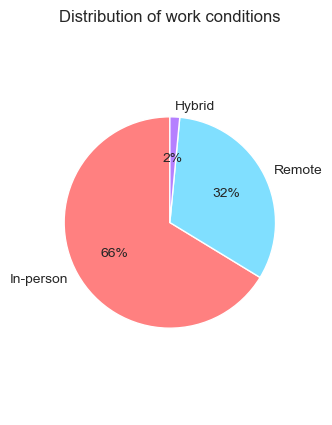

In [128]:
category_counts = df['work_setting'].value_counts() # Calculate the count of each
custom_colors = ['#FF8080', '#80DFFF', '#B580FF', '#FFD580']
plt.figure(figsize=(3, 5)) # Create pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of work conditions')
plt.show()

This Pie Chart shows the percentage of work conditions

*   Hybird
*   Remote
*   In person






Calculate summary statistics for relevant variables.

In [129]:
summary_stats_numerical = df.describe() # calc summary statistics for all numerical var
summary_stats_numerical

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [130]:
summary_categ = df.value_counts() # calc summary statistics for job category
summary_categ

work_year  experience_level  employment_type  job_title                   salary    salary_currency  salary_in_usd  employee_residence  work_setting  company_location  company_size  job_category             
2023       Senior            Full-time        Applied Scientist           136000.0  USD              136000         United States       In-person     United States     L             Data Science and Research    54
                                              Machine Learning Engineer   204500.0  USD              204500         United States       In-person     United States     M             Machine Learning and AI      35
                                                                          142200.0  USD              142200         United States       In-person     United States     M             Machine Learning and AI      34
                                              Applied Scientist           222200.0  USD              222200         United States       In-person     

In [131]:
#just for try
#xchange = 3.75
#df['salary_in_sr'] = df['salary_in_usd'] * exchange # Convert the salary from usd to SR
#df.head(5)